In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip install kaggle
!pip install kaggle-cli

    100% |████████████████████████████████| 61kB 2.6MB/s 
    100% |████████████████████████████████| 235kB 5.8MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
    100% |████████████████████████████████| 81kB 2.9MB/s 
    100% |████████████████████████████████| 5.3MB 1.8MB/s 
    100% |████████████████████████████████| 112kB 26.3MB/s 
    100% |████████████████████████████████| 92kB 27.0MB/s 
    100% |████████████████████████████████| 51kB 20.1MB/s 
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /root/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Running setup.py bdist_wheel for cliff ... 

In [3]:
!kg download  -u konstantinmeskhidze -p lutkostya123456789 -c rsna-pneumonia-detection-challenge

/usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py:37: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  response.content, **soup_config)
downloading https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/download/stage_2_detailed_class_info.csv

stage_2_detailed_class_info.csv 100% |###############| Time: 0:00:00   1.9 MiB/s

downloading https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/download/stage_2_sample_submission.csv

stage_2_sample_submission.csv 100% |#################| Time: 0:00

In [4]:
!ls "/content"

drive					       stage_2_sample_submission.csv
GCP%20Credits%20Request%20Link%20-%20RSNA.txt  stage_2_test_images.zip
sample_data				       stage_2_train_images.zip
stage_2_detailed_class_info.csv		       stage_2_train_labels.csv


In [0]:
import zipfile
with zipfile.ZipFile("stage_2_train_images.zip","r") as zip_ref:
    zip_ref.extractall("stage_train_images")

In [0]:
with zipfile.ZipFile("stage_2_test_images.zip","r") as zip_ref:
    zip_ref.extractall("stage_test_images")

In [7]:
!ls '/content/stage_test_images/' -1A | wc -l

3000


In [8]:
! pip install pydicom

    100% |████████████████████████████████| 7.3MB 5.3MB/s 


In [9]:
! pip install tqdm
! pip install imgaug

    100% |████████████████████████████████| 634kB 6.4MB/s 
  Running setup.py bdist_wheel for imgaug ... - \ done
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug


In [10]:
#import libraries
import os 
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob
from sklearn.model_selection import KFold

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
print(os.listdir())


['sample_data', '.config', 'stage_train_images', 'stage_test_images', 'drive', 'stage_2_train_images.zip', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'stage_2_test_images.zip', 'GCP%20Credits%20Request%20Link%20-%20RSNA.txt', 'stage_2_train_labels.csv']


In [12]:
!pip install -r "drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/requirements.txt"

    100% |████████████████████████████████| 2.1MB 8.0MB/s 
    100% |████████████████████████████████| 163kB 10.9MB/s 
    100% |████████████████████████████████| 204kB 13.6MB/s 
    100% |████████████████████████████████| 3.1MB 10.2MB/s 
    100% |████████████████████████████████| 122kB 28.2MB/s 
    100% |████████████████████████████████| 112kB 25.8MB/s 
    100% |████████████████████████████████| 8.1MB 5.2MB/s 
    100% |████████████████████████████████| 552kB 23.9MB/s 
    100% |████████████████████████████████| 71kB 26.6MB/s 
    100% |████████████████████████████████| 2.2MB 9.5MB/s 


In [13]:
!python3 "drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/colab_setup.py" install


running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/drive
creating build/lib/drive/My Drive
creating build/lib/drive/My Drive/Colab
creating build/lib/drive/My Drive/Colab/Kaggle_RSA_Competition
creating build/lib/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master
creating build/lib/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mrcnn
copying drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mrcnn/config.py -> build/lib/drive/My Drive/Colab/Kaggle_RSA_Competi

In [14]:
# Root directory of the RCNN lib
ROOT_DIR = os.path.abspath("drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the lib
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log



Using TensorFlow backend.


In [15]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master',
 '/']

In [16]:
class DetectorConfig(Config):
    """Override config class in mrcnn lib for Pneumonia detection on the RSNA kaggle dataset.
    """

    # Give the configuration a recognizable name
    NAME = 'Pneumonia'

    # Train on 1 GPU and 1 images per GPU. We can put multiple images on each

    GPU_COUNT = 1
    IMAGES_PER_GPU = 6

    BACKBONE = 'resnet50'

    NUM_CLASSES = 2  # background (BG) + 1 Pneumonia classes

    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78  ## match target distribution
    DETECTION_NMS_THRESHOLD = 0.01

    STEPS_PER_EPOCH = 100

  

Config = DetectorConfig()
Config.display()



Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     6
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 6
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [0]:
class DetectorDataset(utils.Dataset):
    """Override Dataset class in mrcnn lib for Pneumonia detection on the RSNA kaggle dataset.
       Could be used for loading train/test/validation datasets
    """

    def __init__(self, image_list, image_information, height, width):
        super().__init__(self)

        # Add classes - we need just 1 class ('Pneumonia')
        self.add_class('Pneumonia', 1, 'Lung Opacity')

        # add images
        for i, file_path in enumerate(image_list):
            image_info_box = image_information[file_path]
            self.add_image('Pneumonia', image_id=i, path=file_path,
                           image_information=image_info_box, image_height=height, image_width=width)

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        file_path = info['path']
        dicom_file = pydicom.read_file(file_path)
        image = dicom_file.pixel_array
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image
      
    def get_target_value(self, image_id):
        info = self.image_info[image_id]
        image_information = info['image_information']
                     
        box_counter = len(image_information)
        
        if box_counter == 0:# Target = 0
           y_target = 1 
        else: # Target = 1
           y_target = 0  
        
        return y_target   

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        image_information = info['image_information']

        box_counter = len(image_information)        
        
        if box_counter == 0:# no lung opacities
            mask = np.zeros((info['image_height'], info['image_width'], 1), dtype=np.uint8)# dummy create mask image
            class_ids = np.zeros((1,), dtype=np.int32)
        else:# have some lung opacity areas
            mask = np.zeros((info['image_height'], info['image_width'], box_counter), dtype=np.uint8)
            class_ids = np.zeros((box_counter,), dtype=np.int32)
            
            for i, box in enumerate(image_information):
                if box['Target'] == 1:
                    x = int(box['x'])
                    y = int(box['y'])
                    width = int(box['width'])
                    height = int(box['height'])
                    
                    mask_inst = mask[:, :, i].copy()

                    cv2.rectangle(mask_inst, (x, y), (x + width, y + height), 255, -1)# create boundary box rectangle
                    mask[:, :, i] = mask_inst
                    class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)  

In [18]:
Path_train_dicom_image = "stage_train_images"

Path_train_boxes_image = "drive/My Drive/Colab/Kaggle_RSA_Competition/stage_2_train_labels.csv"

Path_additional_info = "drive/My Drive/Colab/Kaggle_RSA_Competition/stage_2_detailed_class_info.csv"

Path_submission_example = "drive/My Drive/Colab/Kaggle_RSA_Competition/stage_2_sample_submission.csv"


print(os.listdir("/content"))

print(os.listdir("drive/My Drive/Colab/Kaggle_RSA_Competition/"))

['sample_data', '.config', 'stage_train_images', 'mask_rcnn.egg-info', 'stage_test_images', 'drive', 'dist', 'stage_2_train_images.zip', 'stage_2_detailed_class_info.csv', 'build', 'stage_2_sample_submission.csv', 'stage_2_test_images.zip', 'GCP%20Credits%20Request%20Link%20-%20RSNA.txt', 'stage_2_train_labels.csv']
['cnn_test.ipynb', 'GCP Credits Request Link - RSNA.txt', 'stage_1_sample_submission.csv', 'stage_1_detailed_class_info.csv', 'stage_1_train_labels.csv', 'Mask_RCNN-master', 'Mask_RCNN_model.py', '__init__.py', 'dcmpandas', '__pycache__', 'dcmpandas.py', 'stage_2_sample_submission.csv', 'stage_2_detailed_class_info.csv', 'stage_2_train_labels.csv', 'dicom_analyze.csv', 'cnn_data_analysis.ipynb']


In [19]:
print(os.listdir("drive/My Drive/Colab/Kaggle_RSA_Competition"))

['cnn_test.ipynb', 'GCP Credits Request Link - RSNA.txt', 'stage_1_sample_submission.csv', 'stage_1_detailed_class_info.csv', 'stage_1_train_labels.csv', 'Mask_RCNN-master', 'Mask_RCNN_model.py', '__init__.py', 'dcmpandas', '__pycache__', 'dcmpandas.py', 'stage_2_sample_submission.csv', 'stage_2_detailed_class_info.csv', 'stage_2_train_labels.csv', 'dicom_analyze.csv', 'cnn_data_analysis.ipynb']


In [0]:
def dataset_load (image_dir, image_info_file):
    lstFilesDCM = []
    for dirName, subdirList, fileList in os.walk(image_dir):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM.append(os.path.join(dirName,filename))

    image_info = {pat: [] for pat in lstFilesDCM}
    for index, row in image_info_file.iterrows():
        pat = os.path.join(image_dir, row['patientId']+'.dcm')
        image_info[pat].append(row)
    return lstFilesDCM, image_info
  
def dataset_list_load (image_dir):
    lstFilesDCM = []
    for dirName, subdirList, fileList in os.walk(image_dir):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM.append(os.path.join(dirName,filename))
    return lstFilesDCM 

In [21]:
boxes_labels = pd.read_csv(Path_train_boxes_image)
 
additional_info = pd.read_csv(Path_additional_info)

image_file_list, image_info = dataset_load(Path_train_dicom_image, boxes_labels )

ORIG_SIZE = 1024 # from dicom image :(0028, 0010) Rows   US: 1024

Number_test_size = 500;

len_data = len(image_file_list)

train_size = int(len_data*0.8)

val_size = len_data - train_size



image_file_list_test = image_file_list[:Number_test_size] # local test dataset for ROC curve evaluation

image_file_list_train = image_file_list[Number_test_size:train_size]# train dataset
image_file_list_val = image_file_list[train_size:] # validation dataset

print("Total data size: {}, Test size: {}, Train size: {}, Validation size: {} ".format(len_data, len(image_file_list_test), len(image_file_list_train), len(image_file_list_val)))


dataset_train = DetectorDataset(image_file_list_train, image_info, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

dataset_val = DetectorDataset(image_file_list_val, image_info, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

dataset_test = DetectorDataset(image_file_list_test, image_info, ORIG_SIZE, ORIG_SIZE)
dataset_test.prepare()


Total data size: 26684, Test size: 500, Train size: 20847, Validation size: 5337 


In [22]:
print(image_file_list_test[0:3])

['stage_train_images/70fa8756-5de7-4c3e-86ff-3664c9016364.dcm', 'stage_train_images/335e5897-5c4c-402c-9390-2bed8d592985.dcm', 'stage_train_images/1ad1ecd2-6d21-4f48-bf8d-7a4e6df8c395.dcm']


In [23]:
print(image_file_list_train[0:3])

['stage_train_images/e1bcfa18-5fed-4a92-85fb-14438a17719b.dcm', 'stage_train_images/a2f00821-a074-451d-8e0f-32a6a400d69b.dcm', 'stage_train_images/beda57bb-9e10-49f6-80b8-8b910a279648.dcm']


In [24]:
print(image_file_list_val[0:3])

['stage_train_images/b6ec9835-ad4d-446d-9faa-c206919c1d11.dcm', 'stage_train_images/7934f518-dbaa-4201-922b-1bc93a245e84.dcm', 'stage_train_images/6f50bef2-f849-42c1-8e00-d3003b9ced67.dcm']


For MASK RCNN's  training we need  object masks. The dataset don't have mask images but we can create them from bounding boxes' information. Let's create mask image from an original one.  We need just to create a new black image the same size as the original one and add bounding boxes' areas

Image shape: (1024, 1024, 3)
14975
stage_train_images/6ea77647-dfcc-46bc-b15f-d41dd2349037.dcm
[1]
Target value: 0


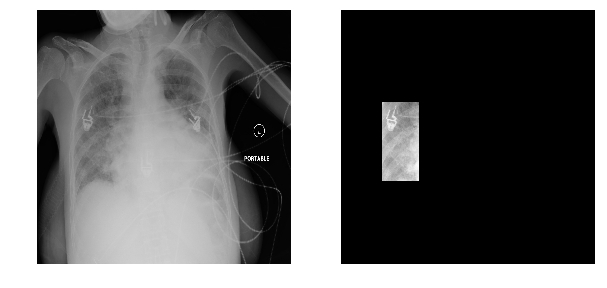

In [26]:
class_ids = [0]
while class_ids[0] == 0:  ## looking for an image with lung opacity
    image_id = random.choice(dataset_train.image_ids)
    image_path = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    Target = dataset_train.get_target_value(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print("Image shape:", image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
image_with_mask = np.zeros(image.shape[:2])

for i in range(mask.shape[2]):
    image_with_mask += image[:, :, 0] * mask[:, :, i] # add mask to an image 
plt.imshow(image_with_mask,cmap='gray')
plt.axis('off')

print(image_id)
print(image_path)
print(class_ids)
print("Target value:",Target)

In [0]:
COCO_WEIGHTS_PATH = "/content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mask_rcnn_coco.h5"

In [0]:
 CNN_model = modellib.MaskRCNN(mode='training', config=Config, model_dir=ROOT_DIR)



In [0]:
# Load weights trained on MS COCO, but skip layers that
# are different due to the different number of classes
# See README for instructions to download the COCO weights
CNN_model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

In [0]:
# Load the last model you trained and continue training
    CNN_model.load_weights(CNN_model.find_last(), by_name=True)

Re-starting from epoch 70


In [0]:
import time

LEARNING_RATE = 0.005

# Train Mask-RCNN Model 
import warnings 
warnings.filterwarnings("ignore")

In [0]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
CNN_model.train(dataset_train, dataset_val, 
            learning_rate=LEARNING_RATE, 
            epochs=5, 
            layers='heads')


Starting at epoch 0. LR=0.005

Checkpoint Path: /content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/pneumonia20181117T1230/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mr

In [0]:
%%time

N_epoch = 25

CNN_model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE/10,
            epochs=N_epoch,
            layers='all')

history = CNN_model.keras_model.history.history


Starting at epoch 5. LR=0.0005

Checkpoint Path: /content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/pneumonia20181117T1230/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (Bat

In [0]:
# save coefficients
model_path = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")
CNN_model.keras_model.save_weights(model_path)


In [0]:
model_path 


'/content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mask_rcnn_shapes.h5'

Example of a submission file for kaggle

In [0]:
submission_example = pd.read_csv(Path_submission_example)
submission_example.head()

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100


In [28]:
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
CNN_model_test = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=ROOT_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = CNN_model_test.find_last()

# Load trained weights
print("Loading weights from ", model_path)
CNN_model_test.load_weights(model_path, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Loading weights from  /content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/pneumonia20181117T1230/mask_rcnn_pneumonia_0025.h5
Re-starting from epoch 25


In [0]:

# Make predictions on test images and write a submission file
def predict_image(image_list, filepath='submission.csv', threshold=0.95):
    # assume square image
    
    resize_value = ORIG_SIZE / Config.IMAGE_SHAPE[0]# get resi

    with open(filepath, 'w') as file:
        file.write("patientId, PredictionString\n")

        for image_id in tqdm(image_list):
            ds = pydicom.read_file(image_id)
            image = ds.pixel_array
            
            # Check for grayscale. Convert into RGB 
            if len(image.shape) != 3 or image.shape[2] != 3:
                image = np.stack((image,) * 3, -1)
            image, window, scale, padding, crop = utils.resize_image(
                image,
                min_dim=Config.IMAGE_MIN_DIM,
                min_scale=Config.IMAGE_MIN_SCALE,
                max_dim=Config.IMAGE_MAX_DIM,
                mode=Config.IMAGE_RESIZE_MODE)

            patient_id = os.path.splitext(os.path.basename(image_id))[0]

            results = CNN_model_test.detect([image])
            
            r = results[0] # get predicted boxes

            # for a string in the submission file
            sub_str = ""
            sub_str += patient_id
            sub_str += ","
            assert( len(r['rois']) == len(r['class_ids']) == len(r['scores']) )
            if len(r['rois']) == 0:# if we don't predict any lung opacity area
                pass
            else:
                box_instances = len(r['rois'])# get number of bounding boxes

                for i in range(box_instances):
                    if r['scores'][i] > threshold:
                        sub_str += ' '
                        sub_str += str(round(r['scores'][i], 2))
                        sub_str += ' '

                        # x1, y1, width, height
                        x1 = r['rois'][i][1]
                        y1 = r['rois'][i][0]
                        x2 = r['rois'][i][3]
                        y2 = r['rois'][i][2]
                        width = x2 - x1
                        height = y2 - y1
                        bound_box_str = "{} {} {} {}".format(x1*resize_value , y1*resize_value , \
                                                           width*resize_value , height*resize_value )
                        sub_str += bound_box_str

            file.write(sub_str+"\n")

In [0]:
Path_test_dicom_image = "stage_test_images"


image_file_list_test = dataset_list_load (Path_test_dicom_image)



In [0]:
Threshold=0.97
submission_file_path = os.path.join(ROOT_DIR, 'submission_resnet50_25epoch.csv')
predict_image(image_file_list_test, filepath=submission_file_path, threshold=Threshold)
print(submission_file_path)

100%|██████████| 3000/3000 [10:23<00:00,  4.80it/s]

/content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/submission_resnet50_25epoch.csv


In [0]:
output = pd.read_csv(submission_file_path)
output.head(60)

,patientId,PredictionString
0,2b6df336-4ab2-48d9-8f10-120c6120bf98,NaN
1,278d3470-9e21-4a07-a946-f6b684beb751,0.97 176.0 316.0 252.0 424.0
2,2a27aad6-fdc7-491f-885d-44d5619a6cf5,NaN
3,22f6c9ae-6c44-4c27-8f9f-5065cbdce475,NaN
4,1b9c8e5a-7c64-416a-ba87-fa424c3ad707,NaN
5,1d832224-bbc0-46f7-af50-27546292dcd7,NaN
6,0fa44268-b43d-4c98-b179-6deb568f0fd7,0.97 624.0 456.0 272.0 236.0
7,2af35a62-3a6a-4e18-8c9b-059a8e0fcd6b,NaN
8,14291892-506f-4f4d-8dca-57f456d2ba57,NaN
9,2392af63-9496-4e72-b348-9276432fd797,NaN


original_image           shape: (256, 256, 3)         min:    1.00000  max:  250.00000  uint8


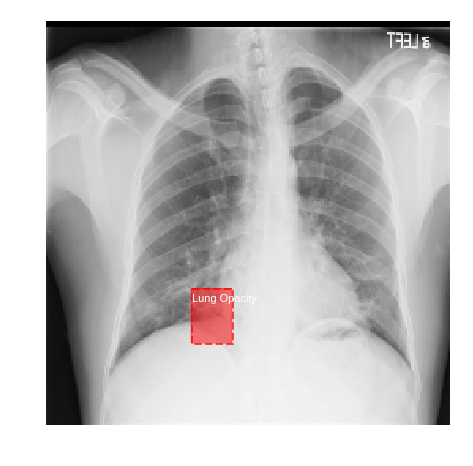

Processing 1 images
image                    shape: (256, 256, 3)         min:    1.00000  max:  250.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -122.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int64
anchors                  shape: (1, 16320, 4)         min:   -0.35494  max:    1.22945  float32


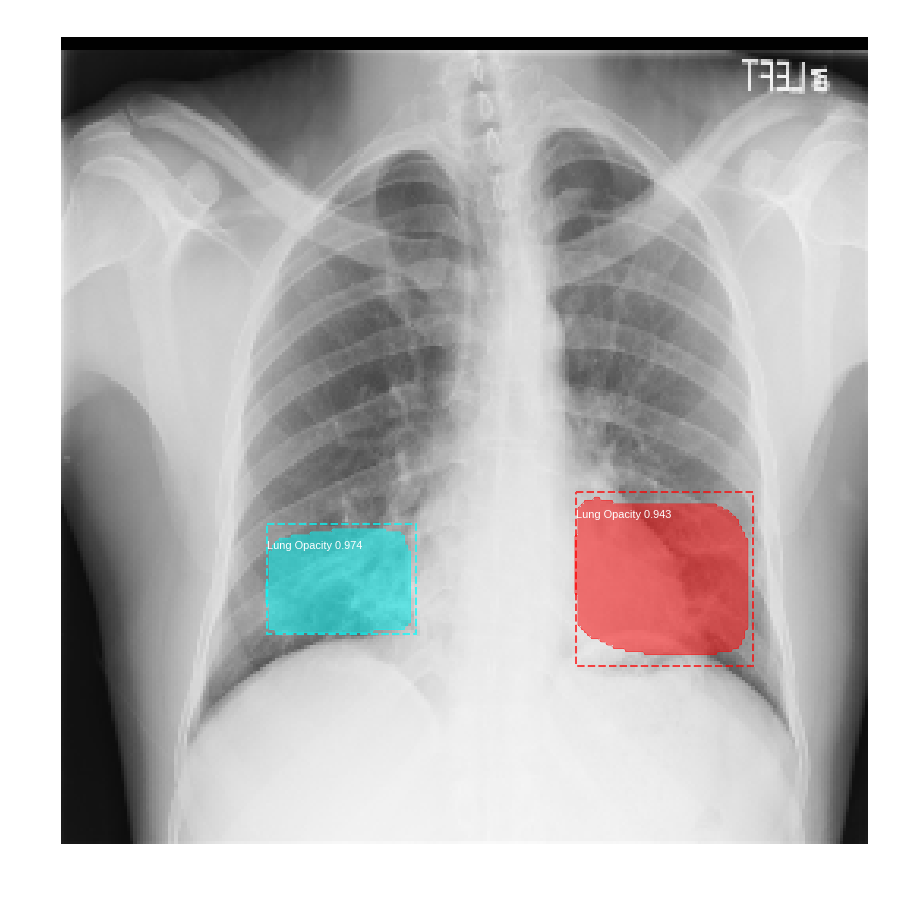

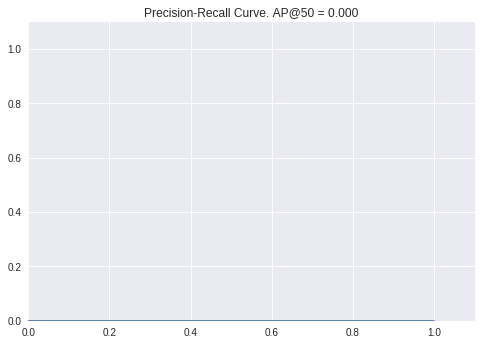

In [29]:
# Test on a random image
image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)
log("original_image", original_image)



visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

results = CNN_model_test.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])

# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)



Let's evaluate the model using the local test dataset and plot ROC curve

In [0]:
!pip install scikit-learn

In [0]:
!pip install  scikit-plot

In [0]:
# import libraries
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt

In [0]:
#Let's extract TRUE Target value from test dataset: 
y_true = np.zeros((Number_test_size,), dtype=np.int32)
y_pred = np.zeros((Number_test_size,), dtype=np.int32)

for i, image_id in tqdm(enumerate(dataset_test.image_ids)):
  
    mask, class_ids = dataset_test.load_mask(image_id)
    y_true[i] = class_ids[0]
        
    # get image array
    image = dataset_test.load_image(image_id)
    
    # get resize value
    resize_value = ORIG_SIZE / Config.IMAGE_SHAPE[0]
    
    # If grayscale. Convert to RGB 
    if len(image.shape) != 3 or image.shape[2] != 3:
        image = np.stack((image,) * 3, -1) 
    resized_image, window, scale, padding, crop = utils.resize_image(
        image,
        min_dim=Config.IMAGE_MIN_DIM,
        min_scale=Config.IMAGE_MIN_SCALE,
        max_dim=Config.IMAGE_MAX_DIM,
        mode=Config.IMAGE_RESIZE_MODE)

    results = CNN_model_test.detect([resized_image])
    r = results[0]
    
    print (r['rois']) #r['masks'] r['class_ids'] r['scores'] r['rois']

    if len(r['rois']) == 0:# if we don't predict any lung opacity area
        y_pred[i] = 0
    else:
        y_pred[i] = 1
           

1it [00:00,  4.76it/s]

[[134  55 191 113]
 [136 156 212 202]]


3it [00:00,  4.81it/s]

[[129  54 182 117]
 [126 174 203 244]
 [ 57  90  92 123]]
[[153  46 187 100]
 [147 154 197 224]]


5it [00:01,  4.93it/s]

[[131  47 167  91]]
[[119  54 180 110]
 [120 150 195 208]]


6it [00:01,  4.86it/s]

[[ 65 140 207 215]
 [102  47 193 107]]
[[125 151 163 197]
 [131  62 160 109]]

8it [00:01,  5.01it/s]


[[125  46 161 102]
 [139 152 178 202]]


9it [00:01,  4.97it/s]

[[122  65 160 111]
 [119 151 186 205]]


10it [00:02,  4.92it/s]

[[132  44 175 108]
 [127 150 176 207]]


11it [00:02,  4.87it/s]

[[138  31 166  83]
 [101 141 184 213]]


12it [00:02,  4.88it/s]

[[133 142 179 178]
 [ 88 143 122 173]]
[[115 158 144 194]
 [108  72 136 109]]


14it [00:02,  4.81it/s]

[[138  36 195  97]]


15it [00:03,  4.76it/s]

[[135  61 169 104]]


16it [00:03,  4.78it/s]

[[132 162 189 211]
 [124  72 174 123]]


17it [00:03,  4.76it/s]

[[ 80  49 114  83]]


18it [00:03,  4.76it/s]

[[113  52 187 112]
 [122 159 188 214]]


19it [00:03,  4.68it/s]

[[135 144 173 180]]


20it [00:04,  4.65it/s]

[[171  48 212 109]
 [151 166 199 226]]


21it [00:04,  4.61it/s]

[[117  64 169 105]
 [ 99 152 194 208]]


22it [00:04,  4.58it/s]

[[183  46 220  91]
 [159 148 226 208]]


23it [00:04,  4.63it/s]

[[ 85 174 146 229]
 [ 82  72 136 126]]


24it [00:05,  4.60it/s]

[[ 73 145 149 209]
 [ 91  38 126  90]]


25it [00:05,  4.55it/s]

[[ 88  50 189  98]
 [ 74 133 211 193]]


26it [00:05,  4.55it/s]

[[ 91  65 117 114]
 [125 157 159 196]]


27it [00:05,  4.60it/s]

[[127  50 174  94]]


28it [00:05,  4.64it/s]

[[ 95  36 160  90]]


29it [00:06,  4.51it/s]

[[ 96 156 196 209]
 [ 90  71 167 125]]


30it [00:06,  4.46it/s]

[[ 76  51 139 100]
 [ 38 143 144 193]]


31it [00:06,  4.56it/s]

[[123  42 163  96]
 [131 146 191 216]]


32it [00:06,  4.63it/s]

[[ 82 144 106 169]]


33it [00:06,  4.67it/s]

[[139 156 196 199]
 [144  59 176  96]]


34it [00:07,  4.69it/s]

[[104 136 163 205]]


35it [00:07,  4.73it/s]

[[110  81 154 111]
 [126 153 164 185]]


36it [00:07,  4.77it/s]

[[123  60 171 116]
 [143 157 184 189]]


37it [00:07,  4.67it/s]

[[121  30 168  89]
 [ 93 115 167 167]
 [ 51  46  90  82]]


38it [00:08,  4.57it/s]

[[105  42 176  97]
 [ 95 141 184 202]]


39it [00:08,  4.62it/s]

[[110  37 154  99]
 [121 144 156 192]]


40it [00:08,  4.65it/s]

[[ 99  69 158 119]
 [ 94 160 154 197]]


41it [00:08,  4.68it/s]

[[149 148 195 200]
 [119  72 175 103]]


42it [00:08,  4.70it/s]

[[123  41 195  93]
 [128 152 210 211]]


43it [00:09,  4.66it/s]

[[144  60 223 113]
 [126 160 182 223]]


44it [00:09,  4.69it/s]

[[138 159 179 199]
 [120  81 158 113]]


45it [00:09,  4.68it/s]

[[106 159 145 209]
 [113  76 140 119]]


46it [00:09,  4.71it/s]

[[ 88 137 139 187]
 [ 99  57 128  92]]


47it [00:09,  4.65it/s]

[[105  58 208 119]
 [131 149 219 194]]


48it [00:10,  4.60it/s]

[[129  48 173 103]
 [144 146 183 186]]


49it [00:10,  4.51it/s]

[[ 84 135 179 197]
 [125  44 168  88]
 [ 67  69 125 107]]


50it [00:10,  4.49it/s]

[[137  68 175 108]
 [128 150 187 214]]


51it [00:10,  4.50it/s]

[[124 148 188 216]
 [124  81 191 113]]


52it [00:11,  4.55it/s]

[[120  75 164 116]
 [143 159 173 203]]


53it [00:11,  4.61it/s]

[[ 91 152 165 202]
 [ 55  76  84 116]]


54it [00:11,  4.65it/s]

[[109  50 184  98]
 [ 98 155 163 214]]


55it [00:11,  4.63it/s]

[[145  49 187 116]
 [131 166 196 235]]


56it [00:11,  4.66it/s]

[[138 157 179 196]
 [148  54 174  93]]


57it [00:12,  4.74it/s]

[[110  48 155 107]
 [124 158 160 197]]


58it [00:12,  4.73it/s]

[[118 140 203 189]
 [140  48 190 104]]


59it [00:12,  4.74it/s]

[[107  44 139  90]
 [119 140 156 181]]


60it [00:12,  4.72it/s]

[[131  48 197 111]
 [153 160 222 220]
 [ 47 156  87 184]]


61it [00:13,  4.69it/s]

[[ 94  27 162  85]
 [ 94 138 188 211]]


62it [00:13,  4.64it/s]

[[140 148 190 187]
 [ 94 148 135 181]
 [ 95  83 146 111]]


63it [00:13,  4.69it/s]

[[133  51 179 112]
 [172 167 224 233]]


64it [00:13,  4.67it/s]

[[134  51 163  98]
 [124 147 166 200]]


65it [00:13,  4.71it/s]

[[105 150 141 185]]


66it [00:14,  4.73it/s]

[[146  74 184 116]]


67it [00:14,  4.62it/s]

[[ 77 142 194 210]
 [ 73  42 187  99]]
[]


69it [00:14,  4.73it/s]

[[115 158 194 214]
 [ 97  52 167 112]]


70it [00:14,  4.75it/s]

[[135  62 172 114]
 [149 163 190 201]]


71it [00:15,  4.74it/s]

[[ 92 154 175 194]]


72it [00:15,  4.71it/s]

[[129 152 168 189]
 [ 95  47 161 102]]


73it [00:15,  4.73it/s]

[[114  39 139  90]
 [120 147 154 191]]


74it [00:15,  4.66it/s]

[[102  37 155  90]
 [120 129 163 180]]


75it [00:15,  4.75it/s]

[]


76it [00:16,  4.76it/s]

[[147 159 200 227]
 [149  46 190 114]]


78it [00:16,  4.84it/s]

[]
[[142  36 184 102]
 [157 148 195 189]]


79it [00:16,  4.64it/s]

[[ 71 137 144 195]
 [ 68  47 136  97]]


80it [00:17,  4.59it/s]

[[ 99  73 166 124]
 [129 159 183 208]]
[[ 94  32 134  94]
 [ 93 137 146 203]]


82it [00:17,  4.55it/s]

[[106  27 149  95]
 [106 141 158 216]]


83it [00:17,  4.56it/s]

[[120  48 222 106]
 [177 164 220 219]]


84it [00:17,  4.62it/s]

[[ 91 145 146 191]
 [ 88  54 141 106]]


85it [00:18,  4.66it/s]

[[114  53 159 110]
 [105 151 166 205]]


86it [00:18,  4.65it/s]

[[106  78 178 116]
 [170 153 205 219]
 [101 153 134 181]]


87it [00:18,  4.59it/s]

[[ 71 153 179 230]
 [119  38 174 101]]


89it [00:18,  4.70it/s]

[[122 122 192 174]
 [ 99  38 179  84]]
[[128 150 156 199]]


90it [00:19,  4.67it/s]

[[103 155 137 208]
 [124  35 159  92]]


92it [00:19,  4.80it/s]

[]
[[156 147 197 181]]


93it [00:19,  4.80it/s]

[[158  53 206 110]
 [178 154 225 199]]


94it [00:20,  4.78it/s]

[[149  64 198 113]
 [138 151 206 212]]


95it [00:20,  4.79it/s]

[[142 146 194 178]]


96it [00:20,  4.70it/s]

[[152  51 193 113]
 [132 159 227 221]]


97it [00:20,  4.64it/s]

[[ 94 145 158 207]
 [106  53 138  90]]


98it [00:20,  4.72it/s]

[[139  38 187  95]]


99it [00:21,  4.63it/s]

[[ 65 169 186 237]
 [ 63  70 169 130]]


100it [00:21,  4.66it/s]

[[138  30 171  71]
 [144 135 181 183]]


101it [00:21,  4.69it/s]

[[127  55 163 100]
 [141 145 175 188]]


102it [00:21,  4.68it/s]

[[143 159 192 201]
 [136  65 193 117]]


103it [00:21,  4.76it/s]

[[143  53 177 107]
 [146 147 191 209]]


104it [00:22,  4.78it/s]

[[136 153 169 186]]


105it [00:22,  4.73it/s]

[[126  44 164  91]
 [128 133 164 173]]


106it [00:22,  4.69it/s]

[[124 142 196 205]
 [110  59 186  96]]


107it [00:22,  4.68it/s]

[[103  70 172 124]
 [124 162 176 202]]


108it [00:23,  4.70it/s]

[[100 147 168 214]
 [109  68 150  99]]


109it [00:23,  4.71it/s]

[[133 145 165 185]
 [ 86  55 113  88]
 [180 156 226 203]]


110it [00:23,  4.71it/s]

[[155  46 201  93]
 [145 135 213 193]]


111it [00:23,  4.65it/s]

[[122  75 163 117]
 [106 167 181 228]]


112it [00:23,  4.68it/s]

[[139  57 170 103]
 [133 156 175 201]]


113it [00:24,  4.70it/s]

[[143 138 217 200]
 [ 94  36 194  94]]


114it [00:24,  4.78it/s]

[[131  59 164 101]
 [122 153 191 216]]


115it [00:24,  4.74it/s]

[[ 62  60 163 103]]


116it [00:24,  4.64it/s]

[[ 83  24 198 101]
 [119 139 225 209]]


117it [00:24,  4.67it/s]

[[ 69 157 138 210]
 [ 85  56 139 113]]


119it [00:25,  4.79it/s]

[[121   7 214  59]
 [113 105 208 175]]
[[154 151 181 197]
 [146  69 174 111]]


120it [00:25,  4.77it/s]

[[101  83 147 109]]


121it [00:25,  4.78it/s]

[[124  62 174 112]]
[[ 81 160 154 219]
 [105  72 142 113]]

122it [00:25,  4.83it/s]

124it [00:26,  4.86it/s]

[[129  62 163 107]
 [130 151 168 189]]
[[121  50 168 115]
 [119 164 174 232]]


126it [00:26,  4.88it/s]

[[116 154 220 205]
 [111  57 188 108]]
[[121  71 163 102]
 [139 161 177 196]]


127it [00:27,  4.82it/s]

[[ 85 150 144 207]]


128it [00:27,  4.81it/s]

[[124  50 173 107]
 [125 145 170 182]]


129it [00:27,  4.74it/s]

[[ 74 153 146 218]
 [121  43 178 110]]


130it [00:27,  4.76it/s]

[[125  79 167 110]
 [141 152 182 186]]


132it [00:28,  4.87it/s]

[[ 97  46 130 100]
 [106 146 156 205]]
[]


133it [00:28,  4.89it/s]

[[112 147 142 174]]


134it [00:28,  4.85it/s]

[[110  35 161  99]
 [111 153 170 215]]


135it [00:28,  4.77it/s]

[[ 68  91 158 140]
 [119 154 178 206]]


136it [00:28,  4.78it/s]

[[101 148 216 226]
 [143  55 208 101]]


137it [00:29,  4.78it/s]

[[113  60 143 103]
 [119 153 154 201]]


138it [00:29,  4.69it/s]

[[132 128 220 186]
 [ 94  45 202  99]]


139it [00:29,  4.73it/s]

[[200  39 253 102]
 [193 161 250 227]
 [ 92 162 166 222]]


140it [00:29,  4.65it/s]

[[129  50 165  97]
 [ 83 144 165 200]]


141it [00:29,  4.68it/s]

[[122 158 164 201]
 [100  79 130 113]]


142it [00:30,  4.67it/s]

[[127 159 160 196]
 [116  70 159 121]]


143it [00:30,  4.71it/s]

[[107  39 164 107]
 [123 153 165 201]]


144it [00:30,  4.67it/s]

[[113 158 198 216]
 [113  68 157 117]]


145it [00:30,  4.61it/s]

[[145  37 170  86]
 [110 151 172 216]
 [ 83  46 109  95]]


146it [00:31,  4.65it/s]

[[149  49 217 107]
 [123 155 217 220]]


147it [00:31,  4.60it/s]

[[146  31 192  89]
 [145 152 196 199]
 [ 58 140 115 168]]


148it [00:31,  4.65it/s]

[[116  21 138  76]
 [121 121 167 196]]


149it [00:31,  4.58it/s]

[[ 98  58 155 109]
 [124 146 164 188]]


150it [00:31,  4.52it/s]

[[ 42  50 167 114]
 [ 96 147 175 208]]


151it [00:32,  4.63it/s]

[[132  40 202 104]
 [152 151 225 214]]


152it [00:32,  4.65it/s]

[[127  43 168 101]
 [136 153 198 224]]


153it [00:32,  4.67it/s]

[[117  88 158 116]
 [ 97 160 181 220]]


154it [00:32,  4.62it/s]

[[163 147 192 201]
 [154  46 185  86]
 [ 67  70 103 109]]


155it [00:32,  4.63it/s]

[[128  47 171 111]
 [123 160 179 224]]


156it [00:33,  4.72it/s]

[[135  62 175 131]
 [ 94 132 173 184]]


158it [00:33,  4.81it/s]

[[127 147 173 210]
 [111  87 161 115]
 [124  49 161  88]]
[[126  37 171  95]]


159it [00:33,  4.77it/s]

[[146 151 196 190]
 [146  62 194 108]]


160it [00:34,  4.78it/s]

[[ 88 157 169 221]
 [103  49 156 108]]


161it [00:34,  4.77it/s]

[[112 146 182 200]
 [126  59 174 103]]


162it [00:34,  4.77it/s]

[[147  46 177  84]
 [150 144 197 200]]


163it [00:34,  4.77it/s]

[[133 148 175 186]
 [130  49 173  95]]


164it [00:34,  4.73it/s]

[[ 91  58 188 108]
 [127 150 196 203]]


165it [00:35,  4.78it/s]

[[ 76 158 142 223]]


166it [00:35,  4.76it/s]

[[126 152 182 216]
 [112  55 147  95]
 [ 84  94 127 119]]


168it [00:35,  4.87it/s]

[]
[[122 148 173 196]]


169it [00:35,  4.86it/s]

[[120 151 160 187]]


170it [00:36,  4.78it/s]

[[157  53 180 105]
 [146 161 198 214]
 [ 99 141 143 183]]


171it [00:36,  4.82it/s]

[[137  52 192 109]
 [152 161 207 226]]
[[158 144 204 180]
 [111 139 143 160]]


173it [00:36,  4.83it/s]

[[126  46 172  88]]


174it [00:36,  4.75it/s]

[[182  63 213 108]
 [137 148 223 209]]


175it [00:37,  4.75it/s]

[[116  33 183 103]
 [100 154 183 231]]


176it [00:37,  4.67it/s]

[[ 93  78 173 131]
 [116 173 183 229]]


177it [00:37,  4.62it/s]

[[ 81 123 170 193]
 [126  19 166  73]]


178it [00:37,  4.67it/s]

[[122  47 157 100]
 [123 160 171 226]]


179it [00:38,  4.60it/s]

[[ 92 143 193 204]]


180it [00:38,  4.63it/s]

[[163  44 229  99]
 [171 151 228 202]]


181it [00:38,  4.60it/s]

[[ 60  44 212 105]
 [ 70 152 178 205]]


182it [00:38,  4.56it/s]

[[106 133 191 185]
 [ 89  50 197 107]]


183it [00:38,  4.63it/s]

[[140 148 177 201]
 [ 83  92 128 113]]


184it [00:39,  4.60it/s]

[[145 147 223 203]
 [125  53 168 112]]


185it [00:39,  4.64it/s]

[[ 95  59 179 119]
 [141 168 188 201]]
[[119  59 192 109]]

186it [00:39,  4.73it/s]

187it [00:39,  4.73it/s]

[[ 92  50 170 109]
 [114 149 165 210]]


188it [00:39,  4.73it/s]

[[117 146 148 188]
 [157  58 187 100]
 [168 141 205 179]]


189it [00:40,  4.63it/s]

[[ 91  64 140 107]
 [104 153 154 194]]


190it [00:40,  4.67it/s]

[[135  45 191 107]
 [109 158 200 210]]


191it [00:40,  4.63it/s]

[[ 91  38 115  84]
 [ 95 154 131 202]]
[[154  56 192 105]
 [118 159 179 215]]


193it [00:41,  4.67it/s]

[[108  63 190 115]
 [ 90 151 195 213]]


194it [00:41,  4.62it/s]

[[101  68 182 118]
 [124 165 170 215]]


195it [00:41,  4.67it/s]

[[152  32 203  94]
 [147 145 216 209]]


196it [00:41,  4.60it/s]

[[ 88  51 159 105]
 [126 140 162 191]]


197it [00:41,  4.65it/s]

[[ 97  72 145 102]
 [110 146 146 174]]


198it [00:42,  4.66it/s]

[[137  53 185 108]]


199it [00:42,  4.68it/s]

[[165  53 204 109]
 [161 155 211 202]]


200it [00:42,  4.62it/s]

[[ 61 134 103 179]
 [ 70  83 119 129]]


201it [00:42,  4.61it/s]

[[145 145 181 190]
 [130  60 162 103]]


202it [00:42,  4.66it/s]

[[106 155 219 211]
 [ 95  46 203 101]]


203it [00:43,  4.62it/s]

[[ 99 127 195 191]
 [168  34 198  83]]


205it [00:43,  4.80it/s]

[[145  55 192 111]]
[]


206it [00:43,  4.85it/s]

[[140  48 176 106]
 [141 157 179 215]]


207it [00:44,  4.87it/s]

[[120  60 151 102]
 [110 164 156 225]]


208it [00:44,  4.79it/s]

[[112  29 145  85]
 [110 143 150 185]]


209it [00:44,  4.78it/s]

[[147  58 183 102]
 [118 146 199 206]]


211it [00:44,  4.84it/s]

[[ 94 156 175 209]
 [123  79 156 119]]
[[121 153 155 196]
 [105  77 144 108]]


212it [00:45,  4.88it/s]

[[100  98 144 127]
 [112 153 153 183]]


213it [00:45,  4.80it/s]

[[ 66  60 171 120]
 [ 69 149 174 214]]


214it [00:45,  4.83it/s]

[[121 148 169 180]
 [113  61 166 105]]


215it [00:45,  4.75it/s]

[[154  54 193  92]
 [141 143 220 207]]


216it [00:45,  4.77it/s]

[[103  42 136 103]
 [110 146 167 227]]


217it [00:46,  4.82it/s]

[[139 152 196 209]]


218it [00:46,  4.81it/s]

[[108  56 133 104]
 [137 151 184 228]]


219it [00:46,  4.79it/s]

[[133  71 194 122]
 [145 160 197 201]]
[[177  57 211 101]
 [ 91 142 128 178]
 [159 153 196 189]]

220it [00:46,  4.80it/s]

221it [00:46,  4.76it/s]

[[151 154 187 203]
 [ 80 142 116 192]]


222it [00:47,  4.78it/s]

[[125 143 168 206]
 [135  58 161 101]]


223it [00:47,  4.69it/s]

[[130 153 174 190]
 [109  63 137  94]]
[[149  43 211  99]]


225it [00:47,  4.79it/s]

[[112  70 156 119]
 [127 158 171 198]]


226it [00:47,  4.68it/s]

[[ 89  68 174 125]
 [ 94 151 193 208]]


227it [00:48,  4.75it/s]

[[113  59 142 105]
 [101 156 154 222]]


228it [00:48,  4.69it/s]

[[118  33 189 108]
 [ 95 152 171 221]
 [ 41  57  94 118]]


229it [00:48,  4.66it/s]

[[142 154 182 199]
 [119  97 174 128]]


230it [00:48,  4.69it/s]

[[156 142 198 180]
 [165  33 193  89]]


231it [00:49,  4.65it/s]

[[ 61  73 166 133]
 [ 85 163 174 228]]


233it [00:49,  4.70it/s]

[[130  48 180 110]
 [134 158 196 226]]
[[115  34 160 101]
 [124 142 163 175]]


234it [00:49,  4.71it/s]

[[168 146 199 187]
 [185  51 211  95]]


235it [00:49,  4.74it/s]

[[ 99 169 131 214]
 [ 88  63 162 116]
 [139 169 178 215]]


236it [00:50,  4.74it/s]

[[129  53 212 105]
 [119 137 215 189]]


237it [00:50,  4.75it/s]

[[138  76 172 123]
 [129 166 180 222]]
[[116  48 145  98]
 [121 140 162 192]]


240it [00:50,  4.85it/s]

[[120  70 160 107]
 [120 140 167 216]]
[[ 60  66 103 101]
 [125 147 190 222]]


241it [00:51,  4.84it/s]

[[114 141 170 201]
 [137  56 163 107]]


243it [00:51,  4.85it/s]

[[111 148 149 188]
 [134  57 177 110]
 [ 96  78 133 115]]
[[128  61 159 105]
 [135 150 162 198]]


244it [00:51,  4.87it/s]

[[151  34 207  92]
 [155 140 221 207]]


245it [00:51,  4.80it/s]

[[127  53 160  98]
 [123 149 182 203]]


246it [00:52,  4.85it/s]

[[147 161 191 204]
 [103  59 177 116]]


247it [00:52,  4.83it/s]

[[103  58 156 114]
 [103 145 164 207]]


248it [00:52,  4.71it/s]

[[ 96  66 161 118]
 [101 157 188 219]]


249it [00:52,  4.62it/s]

[[109  50 187 111]
 [110 149 200 206]]


250it [00:53,  4.68it/s]

[[113 156 152 197]
 [ 89  42 116 101]]


251it [00:53,  4.69it/s]

[[135 157 176 198]
 [123  37 176 110]]


252it [00:53,  4.65it/s]

[[135 153 176 197]
 [129  62 165 102]]


253it [00:53,  4.66it/s]

[[122  57 151 110]
 [115 153 167 222]]


254it [00:53,  4.72it/s]

[[128  49 191 104]
 [136 134 189 194]]


255it [00:54,  4.73it/s]

[[134 142 175 179]
 [158  38 210 101]
 [ 96  63 150 106]]


257it [00:54,  4.78it/s]

[[ 78  24 154  79]
 [ 77 115 165 179]]
[[119  44 157  81]
 [143 154 182 191]]


259it [00:54,  4.80it/s]

[[106 139 199 191]
 [123  53 188 105]
 [ 69  63 123 100]]
[[109 144 144 177]
 [144 140 199 197]]


260it [00:55,  4.81it/s]

[[133  51 185 107]]


261it [00:55,  4.79it/s]

[[ 72 134 148 200]
 [ 85  30 129  91]]


262it [00:55,  4.70it/s]

[[ 59  68 162 130]
 [ 50 167 186 240]]


263it [00:55,  4.72it/s]

[[108 153 186 206]
 [117  59 179 109]]


264it [00:56,  4.70it/s]

[[130  55 208 116]
 [106 158 215 215]]


265it [00:56,  4.72it/s]

[[126 146 214 195]
 [156  56 196  93]]


266it [00:56,  4.73it/s]

[[154 154 205 197]
 [123  72 204 113]]


267it [00:56,  4.67it/s]

[[115  72 142 110]
 [118 158 152 193]]


268it [00:56,  4.67it/s]

[[144  55 182  98]
 [136 147 204 204]]


269it [00:57,  4.70it/s]

[[127  63 161 112]
 [101 155 171 215]]


270it [00:57,  4.70it/s]

[[112  52 184 116]
 [ 65 154 105 193]
 [131 175 177 226]]


271it [00:57,  4.68it/s]

[[140 159 183 195]
 [126  71 164 111]]


272it [00:57,  4.68it/s]

[[100 150 136 203]
 [ 96  60 134  99]]


273it [00:57,  4.65it/s]

[[ 90 132 166 177]
 [ 93  80 133 110]]


274it [00:58,  4.65it/s]

[[ 95  45 181 105]
 [115 143 193 207]]


275it [00:58,  4.61it/s]

[[122  57 191 117]
 [123 168 202 227]]


276it [00:58,  4.60it/s]

[[ 95  42 159 102]
 [ 48 142 166 198]]


278it [00:59,  4.75it/s]

[[ 96 122 157 178]
 [ 79  28 153  83]]
[]


279it [00:59,  4.83it/s]

[[123  60 151 102]
 [124 159 165 218]
 [214 190 247 226]]


280it [00:59,  4.82it/s]

[[122 145 158 180]]
[[161  58 191 106]
 [144 148 204 201]]


282it [00:59,  4.86it/s]

[[ 85  53 146 107]
 [124 145 162 181]]


283it [01:00,  4.79it/s]

[[ 61 149 217 215]
 [ 87  48 175 110]]


284it [01:00,  4.79it/s]

[[167  39 200  79]
 [163 154 210 199]]


285it [01:00,  4.83it/s]

[[121  38 173 100]
 [131 151 174 187]]


286it [01:00,  4.70it/s]

[[120  57 182 111]
 [ 80 147 182 209]]
[[152 151 202 217]
 [144  52 184  98]]

287it [01:00,  4.78it/s]

288it [01:01,  4.75it/s]

[[111 153 148 185]
 [ 93  50 147 113]]


289it [01:01,  4.74it/s]

[[111 138 150 181]
 [104  78 161 125]]
[[133 143 169 189]
 [ 87  44 160  93]]


291it [01:01,  4.75it/s]

[[123  38 173 116]
 [104 161 176 235]]


292it [01:01,  4.73it/s]

[[ 95  38 156  96]
 [ 72 140 157 195]]


293it [01:02,  4.77it/s]

[]


294it [01:02,  4.76it/s]

[[ 97 139 188 194]
 [116  41 175 102]]
[[146 160 201 224]
 [141  60 172 105]]


296it [01:02,  4.79it/s]

[[149  44 202  95]
 [127 146 207 208]]


297it [01:02,  4.77it/s]

[[115 145 172 196]
 [123  51 163 109]]


298it [01:03,  4.76it/s]

[[ 98  46 134  89]
 [100 137 139 174]]


299it [01:03,  4.76it/s]

[[126  79 155 116]
 [112 159 145 202]]


301it [01:03,  4.85it/s]

[[157  71 198 111]
 [146 156 209 223]]
[[157  61 226 117]]


302it [01:04,  4.89it/s]

[[146  64 182 114]
 [122 158 178 211]]


303it [01:04,  4.84it/s]

[[170  47 224 104]
 [121 150 217 203]
 [ 55 141 109 167]]


304it [01:04,  4.73it/s]

[[ 95  47 143  96]
 [ 72 143 150 204]]


305it [01:04,  4.75it/s]

[[ 79  36 141 103]
 [102 147 141 200]]


306it [01:04,  4.74it/s]

[[146  69 178 114]
 [131 164 188 224]]


307it [01:05,  4.77it/s]

[[ 88 129 169 191]
 [ 46  26 127  91]]


308it [01:05,  4.82it/s]

[[134  48 178 115]
 [131 165 181 232]]


309it [01:05,  4.81it/s]

[[ 96 154 167 208]
 [101  63 155 114]]


310it [01:05,  4.79it/s]

[[145 158 207 219]
 [121  68 197 112]]


312it [01:06,  4.85it/s]

[[114  42 194 101]
 [127 145 204 211]]
[[ 86  61 115  99]
 [102 156 141 207]
 [119  54 147  94]]


313it [01:06,  4.76it/s]

[[ 88  27 177  87]
 [ 85 130 188 205]]


315it [01:06,  4.85it/s]

[[141 168 198 213]
 [ 91 162 135 194]
 [125  85 171 123]]
[]


317it [01:07,  4.89it/s]

[[114  87 146 113]]
[[146  58 179 100]]


318it [01:07,  4.90it/s]

[[125  66 169 106]
 [144 151 183 193]]


319it [01:07,  4.77it/s]

[[105 149 184 202]
 [111  63 176 116]]


320it [01:07,  4.73it/s]

[[111 127 191 198]
 [170  42 196  85]]


321it [01:07,  4.62it/s]

[[ 42  46 130 102]
 [ 35 134 107 193]]


322it [01:08,  4.65it/s]

[[147  54 182 110]
 [167 160 222 224]]
[[118 156 184 206]
 [133  90 183 120]]

323it [01:08,  4.71it/s]

324it [01:08,  4.64it/s]

[[111  98 145 132]
 [ 76 178 164 226]]
[[ 92 144 140 179]
 [ 75  82 121 106]]

325it [01:08,  4.70it/s]

326it [01:09,  4.63it/s]

[[ 85 158 151 210]
 [118  73 160 110]]


327it [01:09,  4.66it/s]

[[130  54 177 112]
 [117 159 187 232]]


328it [01:09,  4.61it/s]

[[ 48 145 145 210]
 [108  26 139  76]]


329it [01:09,  4.65it/s]

[[133  47 200 108]
 [141 156 200 208]]


330it [01:09,  4.67it/s]

[[111  85 165 118]
 [124 155 168 182]]


331it [01:10,  4.62it/s]

[[ 86  37 197  99]
 [135 141 226 197]
 [ 49 143  97 187]]


332it [01:10,  4.67it/s]

[[126  42 166  85]
 [139 145 182 214]]


333it [01:10,  4.71it/s]

[[103  59 145 105]
 [167 158 222 202]]


334it [01:10,  4.65it/s]

[[111  52 189 112]
 [104 145 185 208]]


335it [01:11,  4.61it/s]

[[101  50 168 111]
 [117 149 179 203]]


336it [01:11,  4.66it/s]

[[ 95  83 130 111]
 [113 151 146 191]]
[[ 86  49 140 110]
 [ 56 147 158 203]]

337it [01:11,  4.75it/s]

339it [01:11,  4.79it/s]

[[113  53 169 104]
 [131 145 175 182]]
[[140 159 185 196]
 [134  70 178 111]
 [ 94 156 131 185]]


340it [01:12,  4.74it/s]

[[123  61 188 116]]


341it [01:12,  4.74it/s]

[[100  84 139 141]
 [ 80 164 202 240]]


342it [01:12,  4.66it/s]

[[ 64 122 143 202]
 [120  36 157  81]]


343it [01:12,  4.69it/s]

[[147 143 180 176]]


344it [01:12,  4.70it/s]

[[137  50 162  97]
 [150 140 197 199]]


345it [01:13,  4.73it/s]

[[104  73 169 118]]
[[132 150 216 206]
 [128  54 191 104]]


347it [01:13,  4.79it/s]

[[153  48 201 107]]


348it [01:13,  4.79it/s]

[[133 143 179 178]
 [ 45 145  80 176]
 [  9  13  37  36]]
[[113  54 161 110]
 [111 150 181 206]]


351it [01:14,  4.88it/s]

[]
[[106  72 156 105]
 [128 150 166 192]]


352it [01:14,  4.80it/s]

[[106 152 139 187]
 [174 155 221 200]
 [100  77 134 112]]


353it [01:14,  4.72it/s]

[[101  52 146  98]
 [ 95 135 155 204]]


354it [01:14,  4.72it/s]

[[121  55 168 112]
 [120 156 174 228]]


355it [01:15,  4.57it/s]

[[ 97  29 171  89]
 [ 76 124 155 187]]


356it [01:15,  4.61it/s]

[[ 89 131 152 183]]


357it [01:15,  4.71it/s]

[[100  49 168 105]
 [130 142 169 190]]


358it [01:15,  4.67it/s]

[[120  47 205 102]
 [133 142 191 195]]


359it [01:16,  4.65it/s]

[[157 162 232 225]
 [155  57 214 114]]


360it [01:16,  4.60it/s]

[[ 65 146 167 201]
 [ 80  63 166 118]]


361it [01:16,  4.59it/s]

[[159  48 201  97]
 [145 156 188 200]]


362it [01:16,  4.56it/s]

[[ 60  84 180 139]
 [ 63 168 188 233]]


363it [01:16,  4.63it/s]

[[161 155 210 198]]


364it [01:17,  4.68it/s]

[[125 146 171 199]
 [127  48 161  97]]


365it [01:17,  4.70it/s]

[[169 146 199 191]
 [154  42 200  96]]
[[143  57 181 102]
 [152 150 186 189]]


367it [01:17,  4.78it/s]

[[ 95 148 171 213]
 [112  61 178 105]]


368it [01:17,  4.79it/s]

[[137  34 191  96]
 [155 150 204 201]]


369it [01:18,  4.69it/s]

[[ 54  32 132  87]
 [ 87 123 173 194]]


371it [01:18,  4.79it/s]

[[159  51 202  99]]
[[122  52 153  96]
 [121 145 168 207]]


372it [01:18,  4.69it/s]

[[ 83  32 200 101]
 [ 81 136 211 213]]


373it [01:19,  4.70it/s]

[[119  44 170 108]
 [116 144 164 203]]


374it [01:19,  4.71it/s]

[[118 142 164 203]
 [102  52 164 107]]


375it [01:19,  4.73it/s]

[[124 140 199 183]
 [168  45 198  91]]


377it [01:19,  4.81it/s]

[[159 151 199 190]
 [104  63 193 111]]
[[106 149 204 206]
 [132  50 199 105]]


378it [01:20,  4.71it/s]

[[ 46 155 100 188]
 [ 87  69 158 128]]


379it [01:20,  4.72it/s]

[[118  22 171  95]
 [ 95 141 175 217]]


380it [01:20,  4.73it/s]

[[118  43 167 100]
 [138 138 186 209]]


382it [01:20,  4.84it/s]

[[127  56 156  95]
 [107 150 163 207]]
[[145  44 179  87]
 [143 152 185 201]]


383it [01:21,  4.78it/s]

[[179  18 236  76]
 [182 125 218 167]]


384it [01:21,  4.65it/s]

[[ 65  51 164 102]
 [115 147 153 202]
 [  8 145  74 184]]


385it [01:21,  4.68it/s]

[[125  49 183 110]
 [183 172 212 227]]


386it [01:21,  4.69it/s]

[[ 96  49 169 105]
 [147 152 190 196]]


387it [01:22,  4.72it/s]

[[117 145 150 212]]


388it [01:22,  4.70it/s]

[[ 91  60 143  95]
 [116 150 168 208]]


389it [01:22,  4.63it/s]

[[122  46 165 105]
 [115 149 168 206]]


390it [01:22,  4.67it/s]

[[149 153 185 197]
 [115  74 179 110]]


391it [01:22,  4.62it/s]

[[ 54 134 165 208]
 [ 40  37 146 101]]


392it [01:23,  4.58it/s]

[[ 60 165 205 242]
 [149  72 197 112]]


393it [01:23,  4.61it/s]

[[131  63 178 107]
 [117 158 188 227]]


394it [01:23,  4.65it/s]

[[172  37 212  88]
 [157 146 223 202]]
[[109  72 144 111]]


396it [01:23,  4.69it/s]

[[104  67 170 120]
 [101 158 189 209]]


397it [01:24,  4.71it/s]

[[ 77 146 149 210]
 [137  47 166  94]]


398it [01:24,  4.78it/s]

[[149  47 199 105]
 [161 154 215 200]]


400it [01:24,  4.86it/s]

[[122  61 158 108]
 [116 158 159 191]]
[[118 162 152 210]]


401it [01:24,  4.86it/s]

[[126 160 169 225]
 [118  49 152  96]]


402it [01:25,  4.73it/s]

[[146  57 182 103]
 [129 154 174 215]
 [ 49 146  89 192]]


403it [01:25,  4.67it/s]

[[ 57  62 166 113]
 [ 56 138 175 190]]


404it [01:25,  4.69it/s]

[[159 155 225 216]
 [ 75 156 117 181]
 [152  70 196 109]]


406it [01:26,  4.77it/s]

[[129 153 182 210]
 [132  66 176 106]]
[]


407it [01:26,  4.81it/s]

[[129  52 170  95]]


408it [01:26,  4.75it/s]

[[118 157 172 212]
 [116  54 156 103]]


409it [01:26,  4.68it/s]

[[ 97  36 162  85]
 [106 127 196 182]]


410it [01:26,  4.69it/s]

[[157 142 203 185]
 [ 79 149 122 189]
 [ 83  48 126  81]]


411it [01:27,  4.71it/s]

[]


412it [01:27,  4.72it/s]

[[146  56 208 116]
 [119 159 196 230]]


413it [01:27,  4.60it/s]

[[ 72 153 170 206]
 [ 53  72 167 125]]


415it [01:27,  4.74it/s]

[]
[[ 46  59 148 114]
 [ 51 144 117 197]]


417it [01:28,  4.84it/s]

[[144  24 216  82]
 [139 120 214 183]]
[[134  55 195 108]
 [133 152 201 205]]


418it [01:28,  4.77it/s]

[[ 83  49 147 111]
 [ 99 149 156 230]]


419it [01:28,  4.68it/s]

[[142  46 180  88]
 [ 69  54 119  89]
 [ 65 142 172 205]]


420it [01:29,  4.66it/s]

[[131  63 183 108]
 [151 159 194 213]
 [ 45 152  86 188]]


421it [01:29,  4.74it/s]

[[ 69  43 122 115]]


422it [01:29,  4.72it/s]

[[ 76  56 156 109]
 [ 85 144 164 207]
 [200 149 236 208]]


423it [01:29,  4.64it/s]

[[132  89 159 125]
 [141 174 186 217]]


424it [01:29,  4.60it/s]

[[ 77  47 169 109]
 [102 147 188 207]]


425it [01:30,  4.65it/s]

[[141  63 180 103]
 [123 160 174 200]]


426it [01:30,  4.68it/s]

[[ 97 174 159 228]
 [129  63 161 103]]
[[121  55 158 110]
 [128 158 165 198]]

427it [01:30,  4.75it/s]

428it [01:30,  4.70it/s]

[[ 90 142 167 210]
 [111  76 156 112]]


429it [01:30,  4.73it/s]

[[114 146 163 194]]


431it [01:31,  4.79it/s]

[[128 156 224 210]
 [120  66 212 121]]
[[ 91  75 164 120]]


432it [01:31,  4.73it/s]

[[ 95  40 199 104]
 [119 150 195 206]]


433it [01:31,  4.80it/s]

[[130 151 177 192]
 [114  57 176 110]]


434it [01:31,  4.79it/s]

[[124  38 197  99]
 [ 99 145 205 228]]


435it [01:32,  4.79it/s]

[[150  53 190  92]]


436it [01:32,  4.77it/s]

[[ 73  63 103 104]
 [140 153 177 190]
 [107  48 147  85]]


437it [01:32,  4.76it/s]

[[ 69 138 218 209]
 [171  36 203  79]]


438it [01:32,  4.74it/s]

[[130 155 178 207]
 [130  69 166 116]]
[[170 182 194 227]]

439it [01:33,  4.81it/s]

440it [01:33,  4.80it/s]

[[130  60 185 109]
 [136 152 193 207]]


441it [01:33,  4.76it/s]

[[106  47 170 107]
 [106 141 197 202]]


442it [01:33,  4.77it/s]

[[127  38 174  99]
 [130 159 174 207]]
[[119  61 149 103]
 [ 96 163 166 221]]

443it [01:33,  4.83it/s]

444it [01:34,  4.80it/s]

[[127  48 195 111]
 [ 81 150 200 223]]


445it [01:34,  4.84it/s]

[[146  54 186 103]
 [130 144 190 193]]


446it [01:34,  4.79it/s]

[[114 135 158 207]
 [ 96  47 154  97]]


447it [01:34,  4.70it/s]

[[139 182 187 233]
 [138  89 166 134]]


448it [01:34,  4.77it/s]

[[121 151 164 206]
 [110  55 140 101]]


449it [01:35,  4.68it/s]

[[ 93  41 135  89]
 [ 98 131 142 178]]


450it [01:35,  4.64it/s]

[[101  46 132  91]
 [ 84 134 156 199]]


451it [01:35,  4.62it/s]

[[149  43 210 100]
 [130 156 218 214]]


452it [01:35,  4.65it/s]

[[185  56 226 105]
 [200 179 246 228]]


453it [01:35,  4.68it/s]

[[ 71  56 188 114]
 [ 69 147 110 182]
 [160 142 219 187]]


454it [01:36,  4.71it/s]

[[147 174 185 217]]


455it [01:36,  4.72it/s]

[[125 156 181 199]
 [117  57 163 111]]


456it [01:36,  4.72it/s]

[[129  65 181 121]
 [101 166 185 230]]


457it [01:36,  4.64it/s]

[[101  51 171 110]
 [ 98 149 160 210]]


458it [01:37,  4.69it/s]

[[122  98 163 126]
 [127 157 170 187]]


459it [01:37,  4.73it/s]

[[148  71 217 113]
 [137 158 238 205]]


460it [01:37,  4.71it/s]

[[ 90  62 116 117]
 [ 90 164 142 225]]


461it [01:37,  4.73it/s]

[[124  83 175 111]
 [143 154 203 210]]


462it [01:37,  4.54it/s]

[[ 50 145 149 197]
 [164  59 203 104]
 [160 150 193 195]]


463it [01:38,  4.51it/s]

[[ 46  51 145  98]
 [ 65 128 162 182]]


464it [01:38,  4.58it/s]

[[111  60 157  98]
 [130 149 186 211]]


465it [01:38,  4.57it/s]

[[106 172 207 237]
 [191  84 224 122]
 [ 95  93 152 139]]
[[143 155 185 198]
 [145  72 177 109]]


467it [01:38,  4.72it/s]

[[ 92  55 135  92]
 [129 142 170 178]]


468it [01:39,  4.74it/s]

[[130 153 184 204]
 [114  80 181 113]]


469it [01:39,  4.67it/s]

[[151  31 199  80]
 [143 117 205 176]
 [ 77  36 127  77]]


470it [01:39,  4.69it/s]

[[158  48 205 105]
 [142 160 212 211]
 [ 84 155 120 197]]


471it [01:39,  4.71it/s]

[[125  31 170 106]
 [119 157 182 220]]


472it [01:40,  4.71it/s]

[[147 148 183 211]
 [124  55 173 109]]
[[129  67 162 115]
 [134 157 171 195]]


474it [01:40,  4.82it/s]

[[117 164 181 230]
 [101  70 158 117]]


475it [01:40,  4.71it/s]

[[122  43 210 105]
 [107 149 223 224]]


476it [01:40,  4.61it/s]

[[156  52 192  94]
 [137 157 215 221]]


477it [01:41,  4.59it/s]

[[143  34 178  79]
 [114 144 204 204]]


478it [01:41,  4.64it/s]

[[128 162 194 218]
 [117  75 173 126]]


479it [01:41,  4.60it/s]

[[ 70  59 168 111]
 [ 47 140 156 191]]


480it [01:41,  4.55it/s]

[[ 28  59 141 116]
 [ 41 134 164 205]]


481it [01:42,  4.56it/s]

[[134  65 184 121]
 [130 166 188 223]]


482it [01:42,  4.62it/s]

[[134  51 187 109]
 [124 154 186 210]]


483it [01:42,  4.67it/s]

[[ 78 156 199 224]
 [ 74  61 178 117]]


484it [01:42,  4.75it/s]

[[107 148 177 204]
 [113  65 143 102]]


485it [01:42,  4.65it/s]

[[ 31 147 182 207]
 [ 51  61 164 113]]


486it [01:43,  4.55it/s]

[[ 79  44 143 101]
 [107 140 176 201]]


487it [01:43,  4.55it/s]

[[166  58 204 102]
 [124 152 203 209]]


488it [01:43,  4.60it/s]

[[130  81 165 125]
 [140 160 177 196]]


489it [01:43,  4.65it/s]

[[129  53 159  96]
 [135 145 168 181]]


490it [01:43,  4.66it/s]

[[ 68  62 168 116]
 [131 152 190 208]]


491it [01:44,  4.68it/s]

[[ 65  54 112 111]
 [150 144 200 181]
 [156  43 189  84]]


492it [01:44,  4.62it/s]

[[130 125 185 188]
 [ 44  58 103  93]
 [146  39 187  69]]


493it [01:44,  4.67it/s]

[[120 162 162 197]]
[[ 99  53 170 122]
 [ 92 159 173 229]]

494it [01:44,  4.76it/s]

495it [01:45,  4.71it/s]

[[135 151 171 198]
 [125  46 173 105]]


496it [01:45,  4.73it/s]

[[156  43 209 100]
 [158 154 219 210]]


497it [01:45,  4.70it/s]

[[100  53 166 113]
 [111 145 190 201]]


498it [01:45,  4.73it/s]

[[116  44 150  93]
 [117 145 151 183]]
[[115  68 151 115]
 [117 157 169 227]]

499it [01:45,  4.80it/s]

500it [01:46,  4.65it/s]

[[ 60 139 184 204]
 [ 70  52 150 103]]


In [0]:
for i in range(Number_test_size):        
    print("Index {}, True TARGET {}, Predicted Target {}".format(i, y_true[i], y_true[i]))

Index 0, True TARGET 0, Predicted Target 0
Index 1, True TARGET 0, Predicted Target 0
Index 2, True TARGET 0, Predicted Target 0
Index 3, True TARGET 0, Predicted Target 0
Index 4, True TARGET 0, Predicted Target 0
Index 5, True TARGET 1, Predicted Target 1
Index 6, True TARGET 1, Predicted Target 1
Index 7, True TARGET 0, Predicted Target 0
Index 8, True TARGET 0, Predicted Target 0
Index 9, True TARGET 0, Predicted Target 0
Index 10, True TARGET 0, Predicted Target 0
Index 11, True TARGET 0, Predicted Target 0
Index 12, True TARGET 0, Predicted Target 0
Index 13, True TARGET 0, Predicted Target 0
Index 14, True TARGET 0, Predicted Target 0
Index 15, True TARGET 0, Predicted Target 0
Index 16, True TARGET 1, Predicted Target 1
Index 17, True TARGET 0, Predicted Target 0
Index 18, True TARGET 0, Predicted Target 0
Index 19, True TARGET 0, Predicted Target 0
Index 20, True TARGET 1, Predicted Target 1
Index 21, True TARGET 1, Predicted Target 1
Index 22, True TARGET 0, Predicted Target 

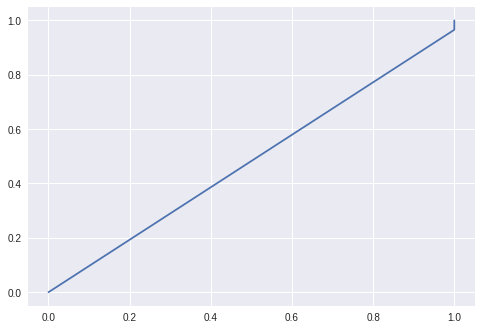

AUC: 0.4827586206896552


In [0]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)